<a href="https://colab.research.google.com/github/teim-projects/Group3_Fouling_Factor_Prediction_in_Heat_Exchanger/blob/main/FuturePredictionUsingMLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
ts_data=pd.read_csv('/content/HeatExchanger_F.csv',delimiter=',')

In [ ]:
ts_data

,date,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance
0,1,207.988664,1.062216e+05,0.004808
1,2,206.018413,9.608924e+04,0.004854
2,3,198.638082,8.599111e+04,0.005034
3,4,191.939783,7.597554e+04,0.005210
4,5,190.557021,6.597393e+04,0.005248
...,...,...,...,...
169,170,91.232129,1.726942e+06,NaN
170,171,90.800838,1.737456e+06,NaN
171,172,90.369548,1.747970e+06,NaN
172,173,89.938257,1.758484e+06,NaN


In [ ]:
ts_data['t_qtr']=ts_data.index+1
ts_data['t_qtr2']=ts_data['t_qtr']**2
ts_data['t_qtr3']=ts_data['t_qtr']**3

In [ ]:
ts_data

,date,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance,t_qtr,t_qtr2,t_qtr3
0,1,207.988664,1.062216e+05,0.004808,1,1,1
1,2,206.018413,9.608924e+04,0.004854,2,4,8
2,3,198.638082,8.599111e+04,0.005034,3,9,27
3,4,191.939783,7.597554e+04,0.005210,4,16,64
4,5,190.557021,6.597393e+04,0.005248,5,25,125
...,...,...,...,...,...,...,...
169,170,91.232129,1.726942e+06,NaN,170,28900,4913000
170,171,90.800838,1.737456e+06,NaN,171,29241,5000211
171,172,90.369548,1.747970e+06,NaN,172,29584,5088448
172,173,89.938257,1.758484e+06,NaN,173,29929,5177717


In [ ]:
ts_data.dtypes

date                                int64
U transfer rate                   float64
Cummulative Flow Tones per day    float64
Fouling Resistance                float64
t_qtr                               int64
t_qtr2                              int64
t_qtr3                              int64
dtype: object

In [ ]:
ts_data.head()

,date,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance,t_qtr,t_qtr2,t_qtr3
0,1,207.988664,106221.55350,0.004808,1,1,1
1,2,206.018413,96089.24125,0.004854,2,4,8
2,3,198.638082,85991.11318,0.005034,3,9,27
3,4,191.939783,75975.54334,0.005210,4,16,64
4,5,190.557021,65973.92528,0.005248,5,25,125


In [ ]:
training=ts_data.loc[0:114]
validation=ts_data.loc[115:143]
trianplusvalid=ts_data.loc[0:143]

#forecast =row 25-28
df=ts_data.loc[0:174]
forecast=ts_data.loc[145:174]

In [ ]:
training

,date,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance,t_qtr,t_qtr2,t_qtr3
0,1,207.988664,1.062216e+05,0.004808,1,1,1
1,2,206.018413,9.608924e+04,0.004854,2,4,8
2,3,198.638082,8.599111e+04,0.005034,3,9,27
3,4,191.939783,7.597554e+04,0.005210,4,16,64
4,5,190.557021,6.597393e+04,0.005248,5,25,125
...,...,...,...,...,...,...,...
110,111,124.543636,1.112301e+06,0.008029,111,12321,1367631
111,112,123.394280,1.123392e+06,0.008104,112,12544,1404928
112,113,124.502526,1.134575e+06,0.008032,113,12769,1442897
113,114,124.013688,1.145664e+06,0.008064,114,12996,1481544


In [ ]:
validation

,date,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance,t_qtr,t_qtr2,t_qtr3
115,116,124.182258,1167376.374,0.008053,116,13456,1560896
116,117,121.410544,1178237.921,0.008237,117,13689,1601613
117,118,105.760586,1187967.877,0.009455,118,13924,1643032
118,119,122.132962,1197586.959,0.008188,119,14161,1685159
119,120,117.483985,1207595.232,0.008512,120,14400,1728000
120,121,108.457820,1217625.451,0.009220,121,14641,1771561
121,122,91.233181,1226494.830,0.010961,122,14884,1815848
122,123,122.488539,1237592.464,0.008164,123,15129,1860867
123,124,130.124778,1248532.660,0.007685,124,15376,1906624
124,125,126.175616,1258398.214,0.007925,125,15625,1953125


In [ ]:
trianplusvalid

,date,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance,t_qtr,t_qtr2,t_qtr3
0,1,207.988664,1.062216e+05,0.004808,1,1,1
1,2,206.018413,9.608924e+04,0.004854,2,4,8
2,3,198.638082,8.599111e+04,0.005034,3,9,27
3,4,191.939783,7.597554e+04,0.005210,4,16,64
4,5,190.557021,6.597393e+04,0.005248,5,25,125
...,...,...,...,...,...,...,...
139,140,102.851032,1.405225e+06,0.009723,140,19600,2744000
140,141,102.824769,1.416414e+06,0.009725,141,19881,2803221
141,142,104.672933,1.427404e+06,0.009554,142,20164,2863288
142,143,109.718283,1.438465e+06,0.009114,143,20449,2924207


In [ ]:
forecast

,date,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance,t_qtr,t_qtr2,t_qtr3
145,146,101.583105,1474602.294,NaN,146,21316,3112136
146,147,101.151814,1485116.430,NaN,147,21609,3176523
147,148,100.720523,1495630.566,NaN,148,21904,3241792
148,149,100.289233,1506144.702,NaN,149,22201,3307949
149,150,99.857942,1516658.838,NaN,150,22500,3375000
150,151,99.426651,1527172.974,NaN,151,22801,3442951
151,152,98.995361,1537687.110,NaN,152,23104,3511808
152,153,98.564070,1548201.246,NaN,153,23409,3581577
153,154,98.132779,1558715.381,NaN,154,23716,3652264
154,155,97.701489,1569229.517,NaN,155,24025,3723875


In [ ]:
y_train=training['Fouling Resistance']
x_train=training.drop(columns=['Fouling Resistance','date '])

y_valid = validation['Fouling Resistance']
x_valid =validation.drop(columns=['Fouling Resistance','date '])

y_trainplusvalid =trianplusvalid['Fouling Resistance']
x_trainplusvalid = trianplusvalid.drop(columns=['Fouling Resistance','date '])

x_forecast=forecast.drop(columns=['Fouling Resistance','date '])

y =df['Fouling Resistance']
x = df.drop(columns=['Fouling Resistance','date '])



In [ ]:
y_train

0      0.004808
1      0.004854
2      0.005034
3      0.005210
4      0.005248
         ...   
110    0.008029
111    0.008104
112    0.008032
113    0.008064
114    0.007776
Name: Fouling Resistance, Length: 115, dtype: float64

In [ ]:
x_valid

,U transfer rate,Cummulative Flow Tones per day,t_qtr,t_qtr2,t_qtr3
115,124.182258,1167376.374,116,13456,1560896
116,121.410544,1178237.921,117,13689,1601613
117,105.760586,1187967.877,118,13924,1643032
118,122.132962,1197586.959,119,14161,1685159
119,117.483985,1207595.232,120,14400,1728000
120,108.457820,1217625.451,121,14641,1771561
121,91.233181,1226494.830,122,14884,1815848
122,122.488539,1237592.464,123,15129,1860867
123,130.124778,1248532.660,124,15376,1906624
124,126.175616,1258398.214,125,15625,1953125


In [ ]:
x_train

,U transfer rate,Cummulative Flow Tones per day,t_qtr,t_qtr2,t_qtr3
0,207.988664,1.062216e+05,1,1,1
1,206.018413,9.608924e+04,2,4,8
2,198.638082,8.599111e+04,3,9,27
3,191.939783,7.597554e+04,4,16,64
4,190.557021,6.597393e+04,5,25,125
...,...,...,...,...,...
110,124.543636,1.112301e+06,111,12321,1367631
111,123.394280,1.123392e+06,112,12544,1404928
112,124.502526,1.134575e+06,113,12769,1442897
113,124.013688,1.145664e+06,114,12996,1481544


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [ ]:
X2=sm.add_constant(x_train)

In [ ]:
X2

,const,U transfer rate,Cummulative Flow Tones per day,t_qtr,t_qtr2,t_qtr3
0,1.0,207.988664,1.062216e+05,1,1,1
1,1.0,206.018413,9.608924e+04,2,4,8
2,1.0,198.638082,8.599111e+04,3,9,27
3,1.0,191.939783,7.597554e+04,4,16,64
4,1.0,190.557021,6.597393e+04,5,25,125
...,...,...,...,...,...,...
110,1.0,124.543636,1.112301e+06,111,12321,1367631
111,1.0,123.394280,1.123392e+06,112,12544,1404928
112,1.0,124.502526,1.134575e+06,113,12769,1442897
113,1.0,124.013688,1.145664e+06,114,12996,1481544


In [ ]:
est=sm.OLS(y_train,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     Fouling Resistance   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2553.
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          3.53e-111
Time:                        07:43:45   Log-Likelihood:                 917.59
No. Observations:                 115   AIC:                            -1823.
Df Residuals:                     109   BIC:                            -1807.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
y_pred=mlr.predict(x_valid)

In [ ]:
y_forecast=mlr.predict(x_forecast)

In [ ]:
y_df=mlr.predict(x)

In [ ]:
y_df

array([0.00470713, 0.0047081 , 0.00500087, 0.00525806, 0.00523026,
       0.00569216, 0.00634385, 0.00616529, 0.00580048, 0.0051664 ,
       0.00541446, 0.00550254, 0.00595573, 0.00624142, 0.00637183,
       0.006562  , 0.00622005, 0.00621279, 0.00635077, 0.00683793,
       0.00702725, 0.00695805, 0.00706889, 0.00708269, 0.00653019,
       0.00644708, 0.00649881, 0.00704902, 0.00724158, 0.00745546,
       0.00727341, 0.00707566, 0.00731091, 0.00742494, 0.0075063 ,
       0.00713407, 0.00728172, 0.00666992, 0.00659408, 0.00685136,
       0.00670763, 0.00725466, 0.00720701, 0.00708768, 0.00705439,
       0.00721752, 0.00747929, 0.00733779, 0.00730169, 0.00797427,
       0.0078184 , 0.0076666 , 0.0072022 , 0.0073419 , 0.00743848,
       0.00759758, 0.00803505, 0.00766947, 0.00763688, 0.00795801,
       0.00806333, 0.00719554, 0.00751696, 0.00757489, 0.00756842,
       0.00769008, 0.00843306, 0.00840134, 0.00831352, 0.00818279,
       0.00791697, 0.00801867, 0.00802288, 0.00803405, 0.00814

In [ ]:
df=pd.DataFrame({'Predicted':y_df})
df
from google.colab import files
df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred

array([0.00803848, 0.00818203, 0.0090133 , 0.00812198, 0.00836191,
       0.00883679, 0.00974762, 0.00805976, 0.00764072, 0.00784002,
       0.00807234, 0.00805961, 0.00848268, 0.00844155, 0.00859544,
       0.00872921, 0.00861477, 0.00867465, 0.00873944, 0.00894047,
       0.00868175, 0.00881211, 0.00896377, 0.00875159, 0.00882547,
       0.00880917, 0.00869066, 0.0083998 , 0.00838704])

In [ ]:
y_forecast

array([0.00878523, 0.00878385, 0.00878171, 0.00877881, 0.00877512,
       0.00877065, 0.00876537, 0.00875928, 0.00875237, 0.00874463,
       0.00873605, 0.00872661, 0.00871631, 0.00870513, 0.00869307,
       0.00868012, 0.00866625, 0.00865147, 0.00863576, 0.00861911,
       0.00860152, 0.00858296, 0.00856343, 0.00854293, 0.00852143,
       0.00849893, 0.00847541, 0.00845087, 0.0084253 ])

In [ ]:
df=pd.DataFrame({'Actual':y_valid,'Predicted':y_pred})
df.sort_index()

,Actual,Predicted
115,0.008053,0.008038
116,0.008237,0.008182
117,0.009455,0.009013
118,0.008188,0.008122
119,0.008512,0.008362
120,0.009220,0.008837
121,0.010961,0.009748
122,0.008164,0.008060
123,0.007685,0.007641
124,0.007925,0.007840


In [ ]:
R2=sklearn.metrics.r2_score(y_valid,y_pred)
MAE=sklearn.metrics.mean_absolute_error(y_valid,y_pred)
RMSE=np.sqrt(sklearn.metrics.mean_squared_error(y_valid,y_pred))

print("R2:{0:.3f} ".format(R2))
print("MAE:{0:.1f} ".format(MAE))
print("RMSE:{0:.1f} ".format(RMSE))

R2:0.320 
MAE:0.0 
RMSE:0.0 


In [ ]:
x_train_no_qtr3 = x_train.drop(columns=['t_qtr3'])
x_valid_no_qtr3 = x_valid.drop(columns=['t_qtr3'])

In [ ]:
mlr.fit(x_train_no_qtr3,y_train)

LinearRegression()

In [ ]:
X2=sm.add_constant(x_train_no_qtr3)
est=sm.OLS(y_train,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     Fouling Resistance   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2681.
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.28e-108
Time:                        07:43:45   Log-Likelihood:                 907.14
No. Observations:                 115   AIC:                            -1804.
Df Residuals:                     110   BIC:                            -1791.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:

y_pred=mlr.predict(x_valid_no_qtr3)
y_pred

array([0.00815128, 0.00830375, 0.00912527, 0.00826965, 0.00851675,
       0.00899329, 0.00989369, 0.00826642, 0.00787526, 0.00808573,
       0.00833003, 0.00833549, 0.00876509, 0.00874358, 0.0089126 ,
       0.00906274, 0.00897201, 0.00905177, 0.009137  , 0.00935519,
       0.00912689, 0.00927826, 0.0094513 , 0.00927265, 0.00937339,
       0.00938701, 0.00930167, 0.0090494 , 0.00906889])

In [ ]:
x_forecast_no_qtr3 = x_forecast.drop(columns=['t_qtr3'])
y_forecast_no_qtr3=mlr.predict(x_forecast_no_qtr3)
y_forecast

array([0.00878523, 0.00878385, 0.00878171, 0.00877881, 0.00877512,
       0.00877065, 0.00876537, 0.00875928, 0.00875237, 0.00874463,
       0.00873605, 0.00872661, 0.00871631, 0.00870513, 0.00869307,
       0.00868012, 0.00866625, 0.00865147, 0.00863576, 0.00861911,
       0.00860152, 0.00858296, 0.00856343, 0.00854293, 0.00852143,
       0.00849893, 0.00847541, 0.00845087, 0.0084253 ])

In [ ]:
df=pd.DataFrame({'Actual':y_valid,'Predicted':y_pred})
df.sort_index()

,Actual,Predicted
115,0.008053,0.008151
116,0.008237,0.008304
117,0.009455,0.009125
118,0.008188,0.008270
119,0.008512,0.008517
120,0.009220,0.008993
121,0.010961,0.009894
122,0.008164,0.008266
123,0.007685,0.007875
124,0.007925,0.008086


In [ ]:
R2=sklearn.metrics.r2_score(y_valid,y_pred)
MAE=sklearn.metrics.mean_absolute_error(y_valid,y_pred)
RMSE=np.sqrt(sklearn.metrics.mean_squared_error(y_valid,y_pred))

print("R2:{0:.3f} ".format(R2))
print("MAE:{0:.1f} ".format(MAE))
print("RMSE:{0:.1f} ".format(RMSE))

R2:0.835 
MAE:0.0 
RMSE:0.0 


In [ ]:
x_trainplusvalid_no_qtr3=x_trainplusvalid.drop(columns=['t_qtr3'])
x_forecast_no_qtr3=x_forecast.drop(columns=['t_qtr3'])

In [ ]:
mlr.fit(x_trainplusvalid_no_qtr3,y_trainplusvalid)

LinearRegression()

In [ ]:
X2=sm.add_constant(x_trainplusvalid_no_qtr3)
est=sm.OLS(y_trainplusvalid,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     Fouling Resistance   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2627.
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          7.69e-130
Time:                        07:43:45   Log-Likelihood:                 1088.6
No. Observations:                 144   AIC:                            -2167.
Df Residuals:                     139   BIC:                            -2152.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
errors = abs(y_pred - y_valid)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
Accuracy: 97.7 %.


<ipython-input-82-16126be699a8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_pred, hist=False, color="r", label="Actual Value")
<ipython-input-82-16126be699a8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_valid, hist=False, color="b", label="Fitted Values" , ax

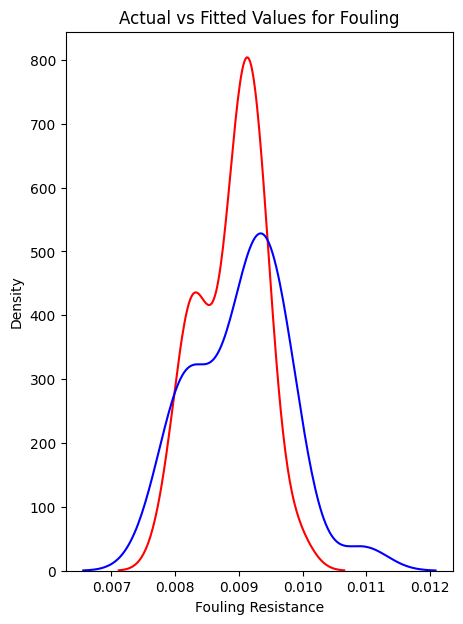

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_pred, hist=False, color="r", label="Actual Value")
sns.distplot(y_valid, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Fouling')


plt.show()
plt.close()